In [4]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [272]:
!ls

adc.json       drive						sample_data
catboost_info  google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb	wget-log


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [9]:
!pip install lightgbm

    100% |████████████████████████████████| 1.1MB 14.5MB/s 


In [0]:
import lightgbm as lgb

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/pasha00786/AmEx/master/cate_data.csv')
del data['Unnamed: 0']

In [401]:
df_train = pd.read_csv('./drive/amex_ps/Training_dataset_Original.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:

df_train = df_train.replace(['na'],np.nan)
df_train = df_train.replace(['missing'],1)

df_train.replace(['L','C'],[0,1],inplace=True)

df_train = df_train.apply(pd.to_numeric, errors = 'coerce')

In [403]:
len(nan_indices)

220526

In [404]:
df_train.isnull().sum().sum()

299783

In [0]:
df_train = df_train.drop(['application_key','default_ind'], axis = 1)


In [0]:
df_train = np.array(df_train)

In [0]:
nan_indices = np.argwhere(np.isnan(df_train))

In [408]:
list_ = nan_indices.tolist()
for vals in list_[:5]:
  print(vals)

[0, 22]
[0, 44]
[1, 44]
[1, 45]
[2, 15]


In [409]:
X = data.drop(['application_key','default_ind'], axis = 1)
y = data['default_ind']
columns = X.columns
X.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,3,9,1,1,1,1,5,2,8,6,...,4,1,1,3,1,7,4,1,1,0.0
1,9,7,1,1,1,2,6,5,7,5,...,2,1,1,2,1,8,4,1,1,1.0
2,6,5,1,1,1,3,3,4,5,3,...,1,1,1,1,1,1,9,1,1,0.0
3,5,3,1,1,1,6,9,6,7,7,...,2,1,1,2,2,3,3,1,1,1.0
4,7,1,1,1,1,7,5,6,4,3,...,2,1,3,2,1,1,8,1,1,1.0


In [0]:
X = np.array(X)
for index in list_:
  X[index[0],index[1]]=np.nan

In [411]:
np.isnan(X)[np.isnan(X) == True].size

299783

In [0]:
from sklearn.ensemble import RandomForestClassifier
features_label = columns
forest = RandomForestClassifier(n_estimators=1000)



In [0]:
forest.fit(X, y)

In [0]:
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

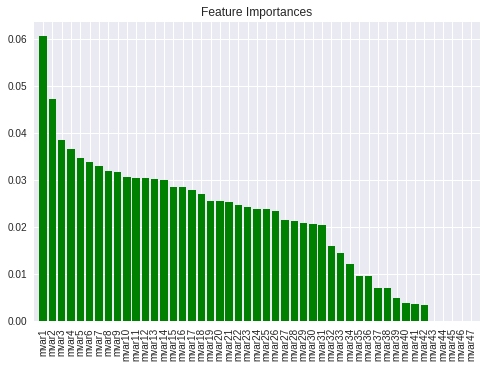

In [32]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/pasha00786/AmEx/master/cate_data.csv')
#del data['Unnamed: 0']

In [131]:
data.columns

Index(['Unnamed: 0', 'application_key', 'mvar1', 'mvar2', 'mvar3', 'mvar4',
       'mvar5', 'mvar6', 'mvar7', 'mvar8', 'mvar9', 'mvar10', 'mvar11',
       'mvar12', 'mvar13', 'mvar14', 'mvar15', 'mvar16', 'mvar17', 'mvar18',
       'mvar19', 'mvar20', 'mvar21', 'mvar22', 'mvar23', 'mvar24', 'mvar25',
       'mvar26', 'mvar27', 'mvar28', 'mvar29', 'mvar30', 'mvar31', 'mvar32',
       'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37', 'mvar38', 'mvar39',
       'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44', 'mvar45', 'mvar46',
       'mvar47', 'default_ind'],
      dtype='object')

In [0]:
x = data.drop(['application_key','default_ind','Unnamed: 0'],axis=1)

In [0]:
y=data['default_ind']

In [134]:
columns = x.columns
columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47'],
      dtype='object')

In [0]:
columns = columns[:]
columns
x = x[columns]

In [3]:
!pip install catboost

    100% |████████████████████████████████| 58.6MB 409kB/s 


In [0]:
from catboost import CatBoostClassifier


In [0]:
!pip install h2o

In [56]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  adwaita-icon-theme at-spi2-core ca-certificates-java default-jre-headless
  fontconfig fonts-dejavu-extra gtk-update-icon-cache hicolor-icon-theme
  humanity-icon-theme java-common libasound2 libasound2-data libasyncns0
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libavahi-client3 libavahi-common-data
  libavahi-common3 libcairo2 libcroco3 libcups2 libdatrie1 libdrm-amdgpu1
  libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libdrm2 libelf1
  libflac8 libfontenc1 libgail-common libgail18 libgdk-pixbuf2.0-0
  libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common libgif7 libgl1-mesa-dri
  libgl1-mesa-glx libglapi-mesa libgraphite2-3 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libharfbuzz0b libjbig0 liblcms2-2 libllvm5.0 libnspr4
  libnss3 libogg0 libpango-1.0-0 libpangocairo-1

In [57]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_171"; OpenJDK Runtime Environment (build 1.8.0_171-8u171-b11-0ubuntu0.17.10.1-b11); OpenJDK 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpke3yx312
  JVM stdout: /tmp/tmpke3yx312/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpke3yx312/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_unknownUser_zwp2d9
H2O cluster total nodes:,1
H2O cluster free memory:,2.827 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
import h2o

In [0]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [51]:
df = pd.DataFrame(X, columns=columns)
df.head()
df['y'] = y
df.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,y
0,3.0,9.0,1.0,1.0,1.0,1.0,5.0,2.0,8.0,6.0,...,1.0,1.0,3.0,1.0,7.0,4.0,NaN,1.0,0.0,0.0
1,9.0,7.0,1.0,1.0,1.0,2.0,6.0,5.0,7.0,5.0,...,1.0,1.0,NaN,1.0,8.0,4.0,NaN,NaN,1.0,1.0
2,6.0,5.0,1.0,1.0,1.0,NaN,3.0,NaN,NaN,3.0,...,1.0,NaN,1.0,1.0,1.0,9.0,NaN,1.0,0.0,1.0
3,5.0,3.0,1.0,1.0,1.0,6.0,9.0,6.0,7.0,7.0,...,1.0,1.0,NaN,2.0,3.0,3.0,1.0,1.0,1.0,0.0
4,7.0,1.0,1.0,1.0,1.0,7.0,5.0,6.0,4.0,3.0,...,1.0,3.0,NaN,1.0,1.0,8.0,NaN,NaN,1.0,0.0


In [58]:
hf = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
X = hf.col_names[:-1]     #last column is Cover_Type, our desired response variable 
y = hf.col_names[-1] 

In [0]:

mdl = H2OGradientBoostingEstimator(ntrees=30,
    learn_rate=0.1,
    max_depth=30,
    stopping_tolerance=0.01, #10-fold increase in threshold as defined in rf_v1
    score_each_iteration=True,
    seed=2000000)

In [0]:
mdl = CatBoostClassifier()


In [0]:
help(mdl)

In [450]:
mdl.fit(X,y)

0:	learn: 0.6553733	total: 43.3ms	remaining: 43.2s
1:	learn: 0.6229404	total: 88.8ms	remaining: 44.3s
2:	learn: 0.5959115	total: 132ms	remaining: 43.9s
3:	learn: 0.5737725	total: 174ms	remaining: 43.3s
4:	learn: 0.5547791	total: 217ms	remaining: 43.1s
5:	learn: 0.5385638	total: 261ms	remaining: 43.2s
6:	learn: 0.5242081	total: 301ms	remaining: 42.7s
7:	learn: 0.5119758	total: 340ms	remaining: 42.2s
8:	learn: 0.5020402	total: 379ms	remaining: 41.7s
9:	learn: 0.4932518	total: 418ms	remaining: 41.4s
10:	learn: 0.4853139	total: 458ms	remaining: 41.2s
11:	learn: 0.4781880	total: 496ms	remaining: 40.9s
12:	learn: 0.4719791	total: 537ms	remaining: 40.8s
13:	learn: 0.4667762	total: 580ms	remaining: 40.8s
14:	learn: 0.4618127	total: 621ms	remaining: 40.8s
15:	learn: 0.4577484	total: 660ms	remaining: 40.6s
16:	learn: 0.4544211	total: 700ms	remaining: 40.5s
17:	learn: 0.4510168	total: 741ms	remaining: 40.4s
18:	learn: 0.4483490	total: 779ms	remaining: 40.2s
19:	learn: 0.4456652	total: 818ms	remai

In [376]:
X

array([[ 3.,  9.,  1., ..., nan,  1.,  0.],
       [ 9.,  7.,  1., ..., nan, nan,  1.],
       [ 6.,  5.,  1., ..., nan,  1.,  0.],
       ...,
       [ 1.,  4.,  5., ..., nan,  1.,  0.],
       [ 7.,  8.,  1., ..., nan,  1.,  1.],
       [ 5.,  9.,  3., ...,  1.,  1.,  0.]])

In [0]:
X.shape

In [105]:
mdl.train(X , y , training_frame = hf)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [0]:
X_imp = pd.DataFrame(X , columns = columns)[list_col]

In [440]:
len(list_col)

21

In [0]:
X_data.to_csv('./drive/final_train.csv',index=False)

In [451]:
help(mdl.fit)

Help on method fit in module catboost.core:

fit(X, y=None, cat_features=None, sample_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None, metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None) method of catboost.core.CatBoostClassifier instance
    Fit the CatBoostClassifier model.
    
    Parameters
    ----------
    X : catboost.Pool or list or numpy.array or pandas.DataFrame or pandas.Series
        If not catboost.Pool, 2 dimensional Feature matrix or string - file with dataset.
    
    y : list or numpy.array or pandas.DataFrame or pandas.Series, optional (default=None)
        Labels, 1 dimensional array like.
        Use only if X is not catboost.Pool.
    
    cat_features : list or numpy.array, optional (default=None)
        If not None, giving the list of Categ columns indices.
        Use only if X is 

In [414]:
test = pd.read_csv('./drive/amex_ps/Leaderboard_dataset.csv')
test.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,350053,1753,0.5001,0.000,0.0,0.0,206,19179,206,14221,...,1,0,missing,20.551,0.42105,3,0.85661,na,0,L
1,350054,1894,1.9701,0.000,0.0,0.0,297,19820,19820,176895,...,3,0,missing,63.047,0,15,0.94391,0,0,C
2,350055,1774,0.1718,0.000,0.0,0.0,197,2563,877,8869,...,1,0,missing,83.797,0.33333,3,0.76467,0,0,C
3,350056,1586,0.1123,5.299,0.0,0.0,missing,missing,missing,missing,...,1,na,missing,missing,1.5,0,NaN,na,na,C
4,350057,1832,1.4442,0.000,0.0,0.0,179,7577,179,21059,...,3,0,96.052,66.665,0,23,0.79190,0,0,L


In [0]:

test = test.replace(['missing','na'],[1,np.nan])

test.replace(['L','C'],[0,1],inplace=True)

test = test.apply(pd.to_numeric, errors = 'coerce')

In [0]:
test = test.drop('application_key',axis=1)

In [0]:
nan_indices = np.argwhere(np.isnan(np.array(test)))

In [418]:
test_da = pd.read_csv('https://raw.githubusercontent.com/pasha00786/AmEx/master/test_cate.csv')
test_da.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,6.0,5.0,1.0,1.0,1.0,3.0,8.0,2.0,6.0,6.0,...,1.0,1.0,1.0,1.0,4.0,3.0,7.0,1.0,1.0,1.0
1,10.0,9.0,1.0,1.0,1.0,3.0,8.0,8.0,10.0,8.0,...,3.0,1.0,1.0,1.0,1.0,8.0,8.0,1.0,1.0,0.0
2,7.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,3.0,...,1.0,1.0,1.0,3.0,4.0,3.0,6.0,1.0,1.0,0.0
3,1.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,5.0,1.0,...,1.0,1.0,1.0,3.0,7.0,1.0,5.0,1.0,1.0,0.0
4,9.0,8.0,1.0,1.0,1.0,3.0,6.0,2.0,7.0,6.0,...,3.0,1.0,1.0,2.0,1.0,9.0,7.0,1.0,1.0,1.0


In [0]:
test_da = np.array(test_da)
for index in nan_indices:
  test_da[index[0],index[1]]=np.nan

In [0]:
test_df =pd.DataFrame(test_da , columns = columns)

In [0]:
test_df.to_csv('./drive/final_test_1.csv',index=False)

In [72]:
test_hf = h2o.H2OFrame(test_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [106]:
predict = mdl.predict(test_data = test_hf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [0]:
predict = predict.as_data_frame().as_matrix()

In [0]:
test_labels  = predict.copy() 

In [0]:
predict = 1*(predict>0.5)

In [110]:
print((test_labels.shape) , (predict.shape))

(25000, 1) (25000, 1)


In [0]:
test_labels = test_labels.reshape(25000)

In [0]:
predict = predict.reshape(25000)

In [0]:
test_da_imp = pd.DataFrame(test_da , columns = columns)[list_col]

In [444]:
test_da_imp.head()

,mvar1,mvar2,mvar3,mvar5,mvar6,mvar8,mvar9,mvar14,mvar18,mvar20,...,mvar23,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33
0,6.0,5.0,1.0,1.0,3.0,2.0,6.0,1.0,1.0,1.0,...,5.0,4.0,1.0,1.0,5.0,9.0,5.0,3.0,7.0,9.0
1,10.0,9.0,1.0,1.0,3.0,8.0,10.0,6.0,1.0,1.0,...,NaN,8.0,8.0,9.0,6.0,10.0,6.0,3.0,10.0,4.0
2,7.0,3.0,1.0,1.0,3.0,3.0,4.0,6.0,1.0,2.0,...,NaN,8.0,9.0,9.0,5.0,7.0,6.0,3.0,6.0,2.0
3,1.0,3.0,4.0,1.0,3.0,5.0,5.0,5.0,NaN,1.0,...,NaN,3.0,3.0,3.0,1.0,2.0,3.0,3.0,2.0,2.0
4,9.0,8.0,1.0,1.0,3.0,2.0,7.0,7.0,1.0,1.0,...,NaN,2.0,4.0,4.0,6.0,5.0,3.0,4.0,3.0,4.0


In [445]:
len(test_da_imp.columns)

21

In [0]:
predict = mdl.predict(test_da)

In [0]:
test_da = pd.read_csv('https://raw.githubusercontent.com/pasha00786/AmEx/master/evaluation_sample.csv')

In [456]:

test_labels=mdl.predict_proba(test_da)[:,1]

test_temp = pd.read_csv('https://raw.githubusercontent.com/pasha00786/AmEx/master/imputed_test.csv')
application = np.array(test_temp['application_key']).astype(int)


data = { 0: application, 1: predict.astype(int), 2: test_labels}
submission = pd.DataFrame(data)
submission = submission.sort_values(2)
submission.drop(2, axis = 1, inplace = True)
submission.head()

,0,1
14620,364673,0
2024,352077,0
7192,357245,0
12389,362442,0
651,350704,0


In [0]:
submission.to_csv('./drive/Slytherin_IITKharagpur.csv',index=False)

In [289]:
col = columns.copy()


Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47'],
      dtype='object')

In [0]:
from catboost import Pool, CatBoostRegressor, cv

In [436]:
imp = mdl.feature_importances_
list_col = []
for col , val in zip(columns , imp):
  print(col, '        ::',val)
  if val>0.018:
    list_col.append(col)

mvar1         :: 0.13
mvar2         :: 0.09
mvar3         :: 0.022857143
mvar4         :: 0.014285714
mvar5         :: 0.034285713
mvar6         :: 0.032857142
mvar7         :: 0.017142856
mvar8         :: 0.018571429
mvar9         :: 0.025714286
mvar10         :: 0.017142856
mvar11         :: 0.015714286
mvar12         :: 0.017142856
mvar13         :: 0.01
mvar14         :: 0.032857142
mvar15         :: 0.012857143
mvar16         :: 0.015714286
mvar17         :: 0.014285714
mvar18         :: 0.03
mvar19         :: 0.014285714
mvar20         :: 0.018571429
mvar21         :: 0.008571428
mvar22         :: 0.022857143
mvar23         :: 0.02
mvar24         :: 0.01
mvar25         :: 0.03
mvar26         :: 0.032857142
mvar27         :: 0.057142857
mvar28         :: 0.025714286
mvar29         :: 0.02
mvar30         :: 0.024285715
mvar31         :: 0.052857142
mvar32         :: 0.027142856
mvar33         :: 0.084285714


In [437]:
len(list_col)

21

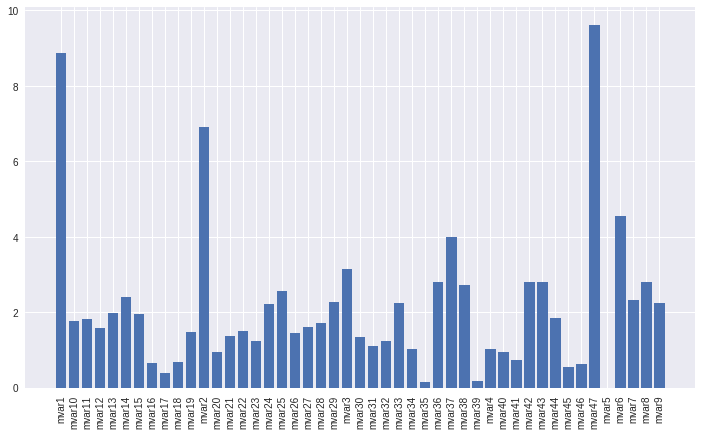

In [461]:
plt.bar(columns,(np.array(mdl.feature_importances_)))
plt.xticks(rotation=90)
plt.figure(figsize=(20,10)) 

#params_tuning

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.grid_search import ParameterGrid
from sklearn.model_selection import train_test_split
from itertools import product, chain
from tqdm import tqdm

In [0]:
RANDOM_STATE = 0
def cross_val(X, y, X_test, param, cat_features, n_splits=3):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    
    acc = []
    predict = None
    
    for tr_ind, val_ind in skf.split(X, y):
        X_train = X[tr_ind]
        y_train = y[tr_ind]
        
        X_valid = X[val_ind]
        y_valid = y[val_ind]
        
        clf = CatBoostClassifier(iterations=500,
                                loss_function = param['loss_function'],
                                depth=param['depth'],
                                l2_leaf_reg = param['l2_leaf_reg'],
                                eval_metric = 'Accuracy',
                                leaf_estimation_iterations = 10,
                                use_best_model=True,
                                logging_level='Silent'
        )
        
        clf.fit(X_train, 
                y_train,
                cat_features=cat_features,
                eval_set=(X_valid, y_valid)
        )
        
        y_pred = clf.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        acc.append(accuracy)
    return sum(acc)/n_splits

In [0]:
def catboost_GridSearchCV(X, y, X_test, params, cat_features, n_splits=5):
    ps = {'acc':0,
          'param': []
    }
    
    predict=None
    
    for prms in tqdm(list(ParameterGrid(params)), ascii=True, desc='Params Tuning:'):
                          
        acc = cross_val(X, y, X_test, prms, cat_features, n_splits=5)

        if acc>ps['acc']:
            ps['acc'] = acc
            ps['param'] = prms
    print('Acc: '+str(ps['acc']))
    print('Params: '+str(ps['param']))
    
    return ps['param']

In [0]:
X_train, _, y_train, __ = train_test_split(X,y,random_state=RANDOM_STATE,train_size=0.9)
X_test = test_da
cat_features = columns

params = {'depth':[2, 3, 4],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg':np.logspace(-20, -19, 3)
}

param = catboost_GridSearchCV(X_train, y_train, X_test, params, np.array(cat_features))

array([0, 1, 2, ..., 8, 9, 8])

In [240]:
X_train

array([[ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0., 12., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  5.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

In [0]:
X = data.drop('default_ind', axis = 1)
y = data['default_ind']

In [256]:
data = pd.read_csv('https://raw.githubusercontent.com/pasha00786/AmEx/master/cate_data.csv')
data.drop(['Unnamed: 0', 'application_key'], axis = 1, inplace = True)
data.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,default_ind
0,3,9,1,1,1,1,5,2,8,6,...,1,1,3,1,7,4,1,1,0.0,0.0
1,9,7,1,1,1,2,6,5,7,5,...,1,1,2,1,8,4,1,1,1.0,1.0
2,6,5,1,1,1,3,3,4,5,3,...,1,1,1,1,1,9,1,1,0.0,1.0
3,5,3,1,1,1,6,9,6,7,7,...,1,1,2,2,3,3,1,1,1.0,0.0
4,7,1,1,1,1,7,5,6,4,3,...,1,3,2,1,1,8,1,1,1.0,0.0


In [260]:
columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar27', 'mvar28', 'mvar29',
       'mvar30', 'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36',
       'mvar37', 'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43',
       'mvar44', 'mvar45', 'mvar46', 'mvar47'],
      dtype='object')

In [0]:
! apt-get install default-jre
!java -version